<a href="https://colab.research.google.com/github/nguyentrong-phuc/BAI_TAP_NHAN_DIEN_ANH/blob/main/rice_ctegory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Khai báo và sử dụng các thư viện sau
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import SGD, RMSprop
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils import validation 
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
%cd /content/drive/MyDrive/AI/BTVN/Rice_Image_Dataset

/content/drive/MyDrive/AI/BTVN/Rice_Image_Dataset


In [4]:
train_data=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [5]:
training_set=train_data.flow_from_directory('/content/drive/MyDrive/AI/BTVN/Rice_Image_Dataset/Train',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 623 images belonging to 5 classes.


In [7]:
validation=train_data.flow_from_directory('/content/drive/MyDrive/AI/BTVN/Rice_Image_Dataset/Validation',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 374 images belonging to 5 classes.


In [8]:
training_set.class_indices

{'Arborio': 0, 'Basmati': 1, 'Ipsala': 2, 'Jasmine': 3, 'Karacadag': 4}

In [9]:
validation.class_indices

{'Arborio': 0, 'Basmati': 1, 'Ipsala': 2, 'Jasmine': 3, 'Karacadag': 4}

In [12]:
# Tạo ra mạng CNN để train mô hình
model=Sequential()
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(256,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(256,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
# Duỗi thẳng dữ liệu 
model.add(Flatten())
model.add(Dense(512,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(256,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(5,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 150, 150, 32)      896       
                                                                 
 conv2d_9 (Conv2D)           (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 75, 75, 64)        18496     
                                                                 
 conv2d_11 (Conv2D)          (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                  

In [13]:
# Biên dịch 
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history=model.fit(training_set,epochs=50,batch_size=128,verbose=1, validation_data=validation, callbacks=[EarlyStopping(monitor='val_loss', patience=20)])

Epoch 1/50
20/20 [==============================] - 298s 15s/step - loss: 2.4720 - accuracy: 0.4302 - val_loss: 1.0903 - val_accuracy: 0.4840
Epoch 2/50
20/20 [==============================] - 136s 7s/step - loss: 0.8214 - accuracy: 0.6758 - val_loss: 0.5440 - val_accuracy: 0.7353
Epoch 3/50
20/20 [==============================] - 136s 7s/step - loss: 0.6449 - accuracy: 0.7335 - val_loss: 0.4423 - val_accuracy: 0.7888
Epoch 4/50
20/20 [==============================] - 136s 7s/step - loss: 0.4970 - accuracy: 0.8090 - val_loss: 0.3628 - val_accuracy: 0.8583
Epoch 5/50
20/20 [==============================] - 135s 7s/step - loss: 0.4589 - accuracy: 0.8347 - val_loss: 0.3227 - val_accuracy: 0.8503
Epoch 6/50
20/20 [==============================] - 135s 7s/step - loss: 0.4119 - accuracy: 0.8459 - val_loss: 0.2421 - val_accuracy: 0.8850
Epoch 7/50
20/20 [==============================] - 135s 7s/step - loss: 0.3281 - accuracy: 0.8764 - val_loss: 0.2360 - val_accuracy: 0.9144
Epoch 8/50
2

In [14]:
# Lưu 
model.save("rice.h5")
model_1=load_model('rice.h5')

In [16]:
# Đánh giá độ chính xác của mô hình 
Score=model.evaluate(training_set,verbose=0)
print('Train Loss', Score[0])
print('Train Accuracy', Score[1])

Train Loss 0.03115815855562687
Train Accuracy 0.9823434948921204


<function matplotlib.pyplot.show(*args, **kw)>

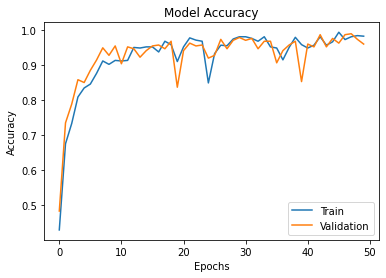

In [17]:
# Vẽ đồ thị giữa số lần học (Epochs) và độ chính xác (Accuracy)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'])
plt.show

1/1 [==============================] - 0s 289ms/step
Arborio


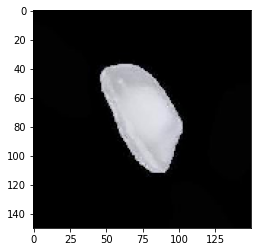

1/1 [==============================] - 0s 83ms/step
Arborio


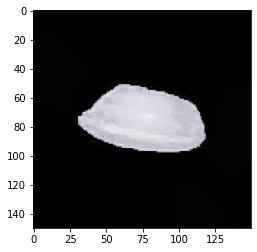

1/1 [==============================] - 0s 80ms/step
Arborio


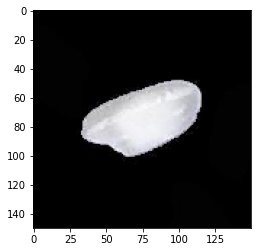

1/1 [==============================] - 0s 74ms/step
Basmati


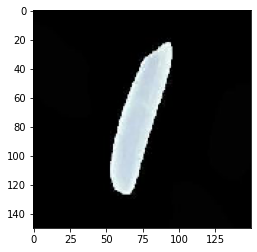

1/1 [==============================] - 0s 72ms/step
Basmati


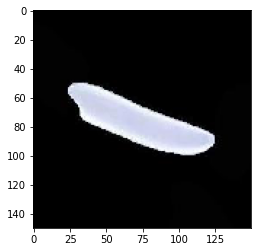

1/1 [==============================] - 0s 74ms/step
IPsala


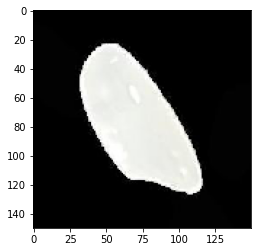

1/1 [==============================] - 0s 74ms/step
IPsala


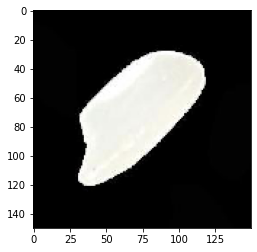

1/1 [==============================] - 0s 79ms/step
Jasmine


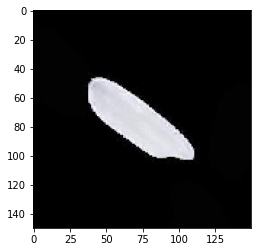

1/1 [==============================] - 0s 80ms/step
Jasmine


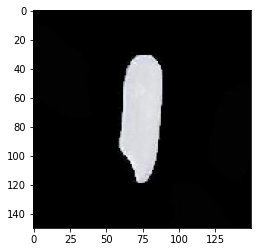

1/1 [==============================] - 0s 73ms/step
karakadag


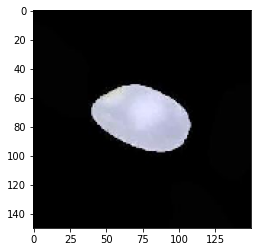

1/1 [==============================] - 0s 83ms/step
karakadag


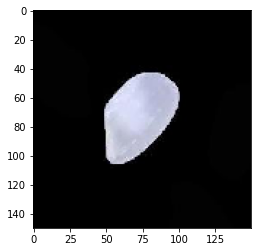

1/1 [==============================] - 0s 77ms/step
karakadag


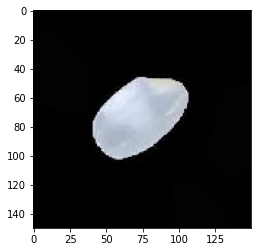

In [18]:
test="/content/drive/MyDrive/AI/BTVN/Rice_Image_Dataset/Test"

for i in os.listdir(test):
  img=load_img(test+'/'+i,target_size=(150,150))
  plt.imshow(img)
  img=img_to_array(img)
  img=img.astype('float32')
  img=img/255
  img=np.expand_dims(img,axis=0)
  result=(model_1.predict(img).argmax())
  class_name=['Arborio','Basmati','IPsala','Jasmine','karakadag']
  print(class_name[result])
  plt.show()